In [26]:
#Чтение заголовка новостей со страницы Яндекса

In [27]:
import requests
from bs4 import BeautifulSoup
l=[]
url = 'https://yandex.ru'
response = requests.get(url)
soup = BeautifulSoup(response.text)
def solution(soup):
    results = soup.find('h1',attrs={'class':"news__tab-wrapper news__head-item"}).parent.next_sibling
    s=results.next.next.next
    l.append(s.text)
    l.append(s.next_sibling.text)
    l.append(s.next_sibling.next_sibling.text)
    l.append(s.next_sibling.next_sibling.next_sibling.text)
    q=soup.find('ol',attrs={'class':"list news__list news__animation-list"}).next
    l.append(q.text)
    return l

In [28]:
solution(soup)

['Дмитрий Гудков сообщил об отъезде на\xa0Украину',
 'Ученые предупредили о\xa0риске синдрома Гийена - Барре после COVID-19',
 'Блинкен пообещал ответ США в\xa0случае проявления агрессии со стороны РФ',
 'В\xa0Совфеде назвали неожиданной рекламой Крыма форму сборной Украины по\xa0футболу',
 'Принц Гарри и Меган Маркл стали родителями во второй раз']

In [29]:
#чтение характеристик фильма со страницы imdb

url = 'https://www.imdb.com/title/tt1838556/?ref_=ttls_li_tt'
response = requests.get(url)
soup = BeautifulSoup(response.text)
def solution(soup):
    b={}
    try:
        b['title']=str(soup.find('h1',attrs={'class':True}).next.replace('\xa0','').strip())
    except:
        b['title']=None
    try:
        b['year']=int(soup.find('span',attrs={'id':"titleYear"}).next.next.text)
    except:
        b['year']=None
    try:
        b['user_rating']=float(soup.find('span',attrs={'itemprop':"ratingValue"}).text)
    except:
        b['user_rating']=None
    try:    
        b['rating_count']=int(soup.find('div',attrs={'class':"ratingValue"}).next_sibling.next.text.replace(',',''))
    except:    
        b['rating_count']=None
    try:
        b['metacritic_score']=float(soup.find('div',attrs={'class':"titleReviewBarSubItem"}).previous_sibling.next.text)
    except:
        b['metacritic_score']=None
    return b

In [30]:
solution(soup)

{'title': 'Честный вор',
 'year': None,
 'user_rating': None,
 'rating_count': None,
 'metacritic_score': None}

Рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта (по таблице по ссылке). Построим зеркальные горизонтальные гистограммы.

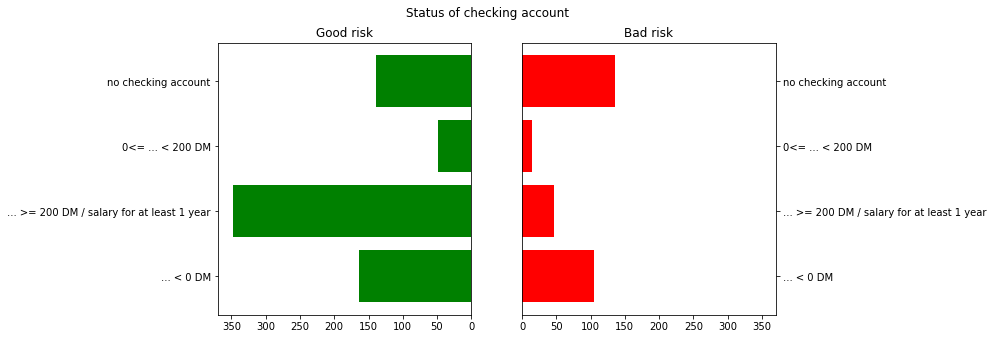

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi
%matplotlib inline
data= pd.read_csv("https://raw.githubusercontent.com/PersDep/data-mining-intro-2021/main/hw03-EDA-data/german_credit.csv")
fig, ax = plt.subplots(1,2,figsize=(10,5))
fig.suptitle('Status of checking account')
g=data[data.credit_risk=='good']['status'].value_counts().sort_index() #в случае положительных кейсов сортируем данные по статусу для совпадения осей двух графиков
b=data[data.credit_risk=='bad']['status'].value_counts().sort_index() #аналогично в случае отрицательных

ax[0].barh(g.index,g.values,color='green') #строим левую часть графика(положительные кейсы)
ax[0].invert_xaxis()
ax[0].set_xbound(370, 0) #устанавливаем предел 370, чтобы графики показывались с одинаковым масштабом
ax[0].set_title('Good risk')

ax[1].barh(b.index,b.values,color='red') #строим правую часть графика(отрицательные кейсы)
ax[1].yaxis.tick_right()
ax[1].set_xbound(370, 0) #устанавливаем предел 370, чтобы графики показывались с одинаковым масштабом
ax[1].set_title('Bad risk')

plt.show()

Не менее полезной иногда может быть диаграмма рассеяния. Постройте такую диаграмму с продолжительностью и размерами кредитов в качестве осей. Обозначим положительные и отрицательные кейсы разными цветами.

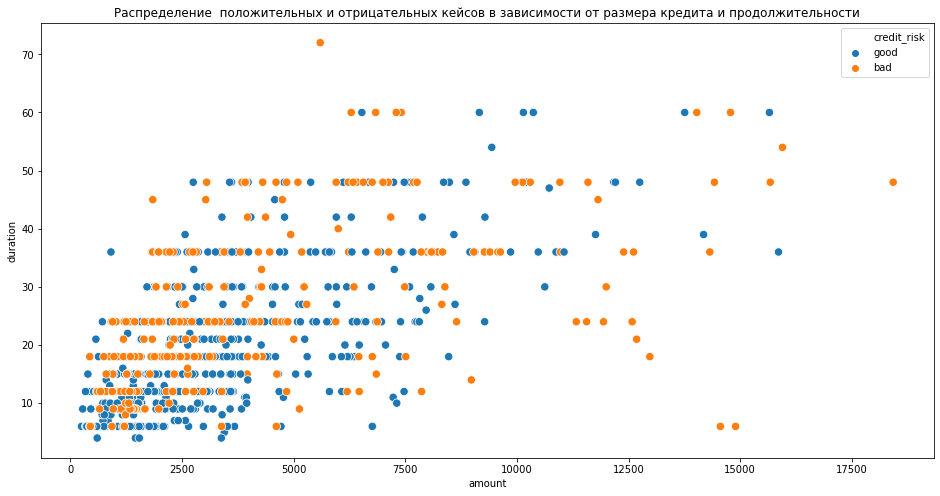

In [44]:
import seaborn as sns
plt.figure(figsize=(16,8))
plt.title('Распределение  положительных и отрицательных кейсов в зависимости от размера кредита и продолжительности')
sns.scatterplot(x='amount',y='duration',hue='credit_risk',s=70,data=data)
plt.show()

Построим 3D версию диаграммы рассеяния, добавив ось с возрастом.

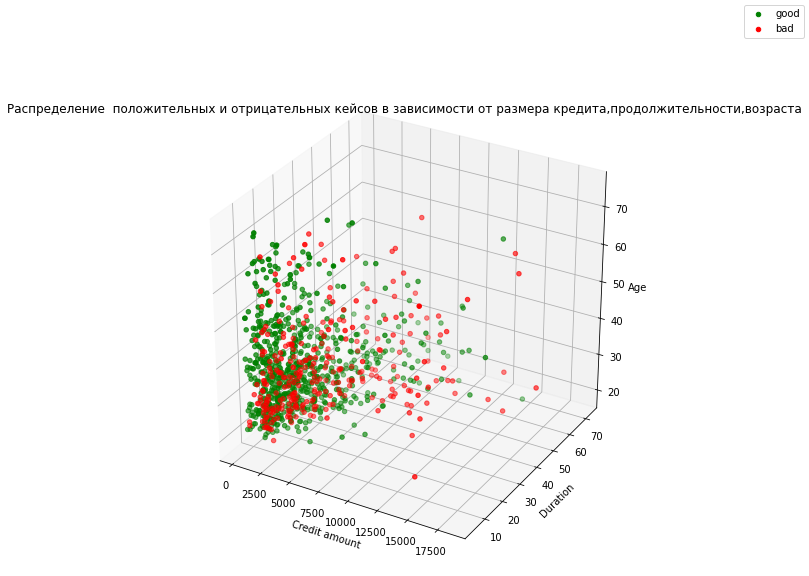

In [34]:
fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111, projection = '3d')

x1 = data[data.credit_risk=='good']['amount']
y1 = data[data.credit_risk=='good']['duration']
z1 = data[data.credit_risk=='good']['age']

x2 = data[data.credit_risk=='bad']['amount']
y2 = data[data.credit_risk=='bad']['duration']
z2 = data[data.credit_risk=='bad']['age']

ax.set_xlabel("Credit amount")
ax.set_ylabel("Duration")
ax.set_zlabel("Age")

ax.scatter(x1, y1, z1,color='green',label='good')
ax.scatter(x2,y2,z2,color='red',label='bad')
fig.legend()
plt.title('Распределение  положительных и отрицательных кейсов в зависимости от размера кредита,продолжительности,возраста')
plt.show()